In [2]:
!pip install git+https://github.com/openai/CLIP.git
import clip
import torch


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-7nj6meri
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-7nj6meri
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=49685a29ef0b82052bd915e5b5cafc0cb7698a95562be2ceead069adf292bc85
  Stored in directory: /tmp/pip-ephem-wheel-cache-ccol9m_g/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


Loading CLIP and testing its similarity on random cat image, with texts as photo of cat, photo of dog and diagram. and it gave 0.9964 accuracy that it is photo of cat.

100%|███████████████████████████████████████| 338M/338M [00:12<00:00, 27.5MiB/s]


📂 Please upload an image file (e.g., cat.jpg)


Saving Bully Dog 2.jpg to Bully Dog 2.jpg


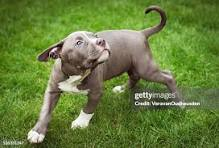

a photo of a cat: 0.0008
a photo of a dog: 0.9980
a diagram: 0.0013


In [3]:
from PIL import Image
from google.colab import files
device = "cuda" if torch.cuda.is_available() else "cpu"

#Load CLIP
model, preprocess = clip.load("ViT-B/32", device=device)

#Upload image
print("📂 Please upload an image file (e.g., cat.jpg)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = Image.open(filename)
display(image)

image_input = preprocess(image).unsqueeze(0).to(device)
text_input = clip.tokenize(["a photo of a cat", "a photo of a dog", "a diagram"]).to(device)

#Encode image and text
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_input)

# similarity
similarity = (image_features @ text_features.T).softmax(dim=-1)

for i, prompt in enumerate(["a photo of a cat", "a photo of a dog", "a diagram"]):
    print(f"{prompt}: {similarity[0][i].item():.4f}")

Loading CIFAR 10 data set with its labels


100%|██████████| 170M/170M [00:03<00:00, 42.6MB/s]


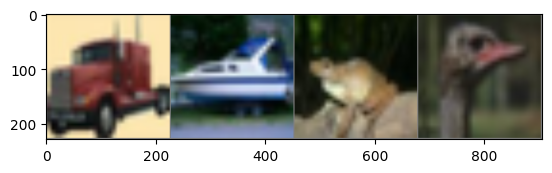

Labels: truck ship frog bird


In [4]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Transform for CIFAR images (resize to 224, since CLIP expects bigger images)
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # resize 32x32 → 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 (download if not already present)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# CIFAR-10 class names
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Show some training images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print('Labels:', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

Making small subset for comparison between CLIP and Resnet

In [5]:
import random

# Select N random indices for comparison
N = 20
random_indices = random.sample(range(len(testset)), N)

comparison_set = []
for idx in random_indices:
    img, label = testset[idx]  # img is already a transformed torch tensor
    comparison_set.append({
        "image": img,                  # transformed tensor for CLIP
        "label": classes[label],       # human-readable class
        "domain": "CIFAR-10"
    })

print(f"Comparison set size: {len(comparison_set)}")
print("Example:", comparison_set[16])

Comparison set size: 20
Example: {'image': tensor([[[-0.8353, -0.8353, -0.8353,  ..., -0.8667, -0.8667, -0.8667],
         [-0.8353, -0.8353, -0.8353,  ..., -0.8667, -0.8667, -0.8667],
         [-0.8353, -0.8353, -0.8353,  ..., -0.8667, -0.8667, -0.8667],
         ...,
         [-0.0980, -0.0980, -0.0980,  ..., -0.0667, -0.0667, -0.0667],
         [-0.0980, -0.0980, -0.0980,  ..., -0.0667, -0.0667, -0.0667],
         [-0.0980, -0.0980, -0.0980,  ..., -0.0667, -0.0667, -0.0667]],

        [[-0.8353, -0.8353, -0.8353,  ..., -0.8510, -0.8510, -0.8510],
         [-0.8353, -0.8353, -0.8353,  ..., -0.8510, -0.8510, -0.8510],
         [-0.8353, -0.8353, -0.8353,  ..., -0.8510, -0.8510, -0.8510],
         ...,
         [ 0.0039,  0.0039,  0.0039,  ..., -0.0118, -0.0118, -0.0118],
         [ 0.0039,  0.0039,  0.0039,  ..., -0.0118, -0.0118, -0.0118],
         [ 0.0039,  0.0039,  0.0039,  ..., -0.0118, -0.0118, -0.0118]],

        [[-0.8353, -0.8353, -0.8353,  ..., -0.8588, -0.8588, -0.8588],
  

Checking CLIP's accuracy on CIFAR 10 dataset

In [6]:
# Precompute text features for all CIFAR-10 class names
text_tokens = clip.tokenize([f"a photo of a {c}" for c in classes]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)  # normalize

# Load CIFAR-10 test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Evaluate accuracy
correct, total = 0, 0
with torch.no_grad():
    for images, labels in tqdm(testloader):
        images, labels = images.to(device), labels.to(device)

        # Encode images
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        # Similarity scores [batch_size, num_classes]
        similarity = image_features @ text_features.T

        # Predicted class = argmax similarity
        preds = similarity.argmax(dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total * 100
print(f"CLIP (ViT-B/32) Zero-shot Accuracy on CIFAR-10: {accuracy:.2f}%")

100%|██████████| 157/157 [00:31<00:00,  5.04it/s]

CLIP (ViT-B/32) Zero-shot Accuracy on CIFAR-10: 84.69%


Checking per class accuracy on clip

In [7]:
import numpy as np

# Track per-class stats
class_correct = [0 for _ in range(len(classes))]
class_total = [0 for _ in range(len(classes))]

with torch.no_grad():
    for images, labels in tqdm(testloader):
        images, labels = images.to(device), labels.to(device)

        # Encode images
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        # Similarity scores [batch_size, num_classes]
        similarity = image_features @ text_features.T

        # Predicted class = argmax similarity
        preds = similarity.argmax(dim=1)

        # Update totals
        for i in range(len(labels)):
            label = labels[i].item()
            class_total[label] += 1
            if preds[i].item() == label:
                class_correct[label] += 1

# Compute per-class accuracy
per_class_acc = {classes[i]: 100 * class_correct[i] / class_total[i]
                 for i in range(len(classes))}

# Print results
print("\nPer-class accuracy on CIFAR-10:")
for cls, acc in per_class_acc.items():
    print(f"{cls}: {acc:.2f}%")

# Find worst-performing class
worst_class = min(per_class_acc, key=per_class_acc.get)
print(f"\nClass CLIP struggled most on: {worst_class} ({per_class_acc[worst_class]:.2f}%)")


100%|██████████| 157/157 [00:19<00:00,  8.00it/s]



Per-class accuracy on CIFAR-10:
airplane: 80.10%
automobile: 89.60%
bird: 82.50%
cat: 75.60%
deer: 85.40%
dog: 80.10%
frog: 73.10%
horse: 94.80%
ship: 92.10%
truck: 93.60%

Class CLIP struggled most on: frog (73.10%)


Let's check CLIP's accuracy using prompt ensembling.

In [8]:
templates = [
    "a photo of a {}",
    "a blurry photo of a {}",
    "a photo of a small {}",
    "a picture of a {}",
    "an image of a {}"
]
# Build prompt embeddings
text_features = []
with torch.no_grad():
    for classname in classes:
        # All prompts for this class
        texts = [template.format(classname) for template in templates]
        tokens = clip.tokenize(texts).to(device)
        class_features = model.encode_text(tokens)
        class_features /= class_features.norm(dim=-1, keepdim=True)

        # Average over prompts → one embedding per class
        class_embedding = class_features.mean(dim=0)
        class_embedding /= class_embedding.norm()

        text_features.append(class_embedding)

# Stack all class embeddings
text_features = torch.stack(text_features, dim=0).to(device)

# Evaluate accuracy
correct, total = 0, 0
with torch.no_grad():
    for images, labels in tqdm(testloader):
        images, labels = images.to(device), labels.to(device)

        # Encode images
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        # Similarity scores [batch_size, num_classes]
        similarity = image_features @ text_features.T

        # Predicted class = argmax similarity
        preds = similarity.argmax(dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total * 100
print(f"CLIP (ViT-B/32) Zero-shot Accuracy with prompt ensembling on CIFAR-10: {accuracy:.2f}%")

100%|██████████| 157/157 [00:17<00:00,  8.86it/s]

CLIP (ViT-B/32) Zero-shot Accuracy with prompt ensembling on CIFAR-10: 84.52%


CLIP's performance on PACS data

In [9]:
from datasets import load_dataset
from torch.utils.data import DataLoader

# 1. Load the PACS dataset from HF
# It returns a DatasetDict; by default just a “train” split containing all domains
dataset = load_dataset("flwrlabs/pacs")  # flwrlabs/pacs has all PACS images + labels + domains :contentReference[oaicite:1]{index=1}
# print("dataset loaded")
print(dataset)
# 2. Define your transforms (resize to CLIP input etc.)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
# print("transform: ")
# print(transform)
# 3. Prepare a PyTorch DataLoader
def collate_fn(batch):
    images = [transform(item['image']) for item in batch]
    labels = [item['label'] for item in batch]
    images = torch.stack(images)
    labels = torch.tensor(labels)
    return images, labels

dataloader = DataLoader(dataset['train'], batch_size=32, shuffle=False, collate_fn=collate_fn)


device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
print(device)

# Precompute text features for PACS classes
classes = ["dog","elephant","giraffe","guitar","horse","house","person"]
text_tokens = clip.tokenize([f"a sketch of a {c}" for c in classes]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)

# 5. Evaluate on the PACS dataset
correct = 0
total = 0

with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)

        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        sims = image_features @ text_features.T
        preds = sims.argmax(dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total * 100
print(f"Zero-shot CLIP accuracy on PACS (all domains): {accuracy:.2f}%")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/191M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9991 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'domain', 'label'],
        num_rows: 9991
    })
})
cuda
Zero-shot CLIP accuracy on PACS (all domains): 93.04%


Few Examples of PACS Dataset

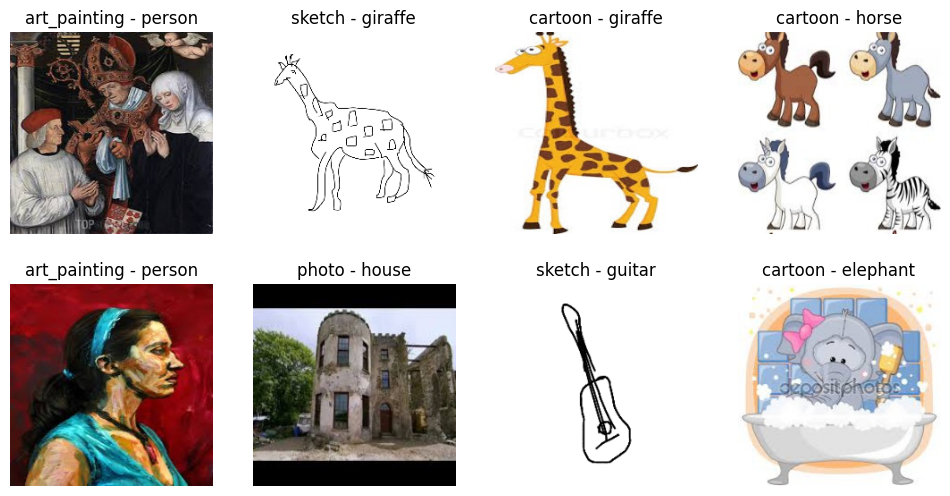

In [10]:
examples = dataset["train"].shuffle(seed=42).select(range(8))

# Plot images with domain + label
plt.figure(figsize=(12, 6))
for i, example in enumerate(examples):
    plt.subplot(2, 4, i+1)
    plt.imshow(example["image"])
    label_name = classes[example["label"]]
    plt.title(f"{example['domain']} - {label_name}")
    plt.axis("off")
plt.show()

Few Shot or Prompt Engineering

In [11]:
# Precompute text features for all CIFAR-10 class names
text_tokens = clip.tokenize([f"{c}" for c in classes]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)  # normalize

# Load CIFAR-10 test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Evaluate accuracy
correct, total = 0, 0
with torch.no_grad():
    for images, labels in tqdm(testloader):
        images, labels = images.to(device), labels.to(device)

        # Encode images
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        # Similarity scores [batch_size, num_classes]
        similarity = image_features @ text_features.T

        # Predicted class = argmax similarity
        preds = similarity.argmax(dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total * 100
print(f"CLIP (ViT-B/32) Zero-shot Accuracy on CIFAR-10 with prompt only as class name: {accuracy:.2f}%")

100%|██████████| 157/157 [00:18<00:00,  8.59it/s]

CLIP (ViT-B/32) Zero-shot Accuracy on CIFAR-10 with prompt only as class name: 7.19%


Saving Guitar 1.jpg to Guitar 1.jpg
Saving Violen 1.jpg to Violen 1.jpg
Saving Lion 2.jpg to Lion 2.jpg
Saving Lion 1.jpg to Lion 1.jpg
Saving Bully Dog 2.jpg to Bully Dog 2 (1).jpg
Saving Bully Dog 1.jpg to Bully Dog 1.jpg
Saving Cute Dog 2.jpg to Cute Dog 2.jpg
Saving Cute Dog 1.jpg to Cute Dog 1.jpg
Saving Plane 2.jpg to Plane 2.jpg
Saving Plane 1.jpg to Plane 1.jpg
Saving House 3.jpg to House 3.jpg
Saving House 2.jpg to House 2.jpg
Saving House 1.jpg to House 1.jpg
Saving Phone 2.jpg to Phone 2.jpg
Saving Phone 1.jpg to Phone 1.jpg
Saving Cat 2.jpg to Cat 2.jpg
Saving Cat 1.jpg to Cat 1.jpg
Query: a photo of a dog -> Retrieved: my_images/Cute Dog 1.jpg


/tmp/ipython-input-3388754407.py:31: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4421.)
  sims = (image_features @ text_features[i].T).squeeze()


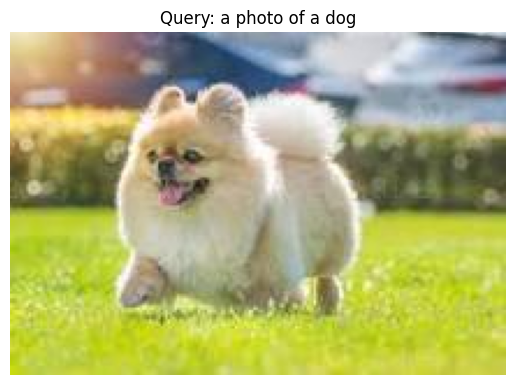

Query: a sketch of a house -> Retrieved: my_images/House 3.jpg


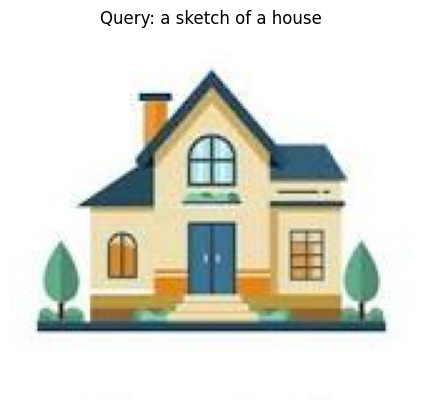

Query: a cartoon of a guitar -> Retrieved: my_images/Guitar 1.jpg


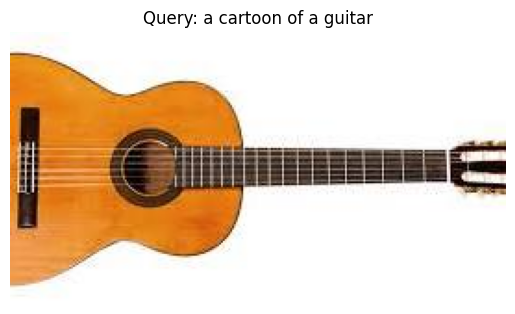

In [12]:
from google.colab import files
import os
import shutil
uploaded = files.upload()

# Make a folder for your images
os.makedirs("my_images", exist_ok=True)

# Move uploaded images into that folder
for fname in uploaded.keys():
    shutil.move(fname, f"my_images/{fname}")

# Collect all image paths
image_paths = [os.path.join("my_images", fname) for fname in os.listdir("my_images")]

# Preprocess and compute embeddings
image_inputs = torch.stack([preprocess(Image.open(p).convert("RGB")) for p in image_paths]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_inputs)
    image_features /= image_features.norm(dim=-1, keepdim=True)  # normalize

queries = ["a photo of a dog", "a sketch of a house", "a cartoon of a guitar"]

text_tokens = clip.tokenize(queries).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)

for i, q in enumerate(queries):
    sims = (image_features @ text_features[i].T).squeeze()
    best_idx = sims.argmax().item()
    best_path = image_paths[best_idx]
    print(f"Query: {q} -> Retrieved: {image_paths[best_idx]}")

    img = Image.open(best_path)
    plt.imshow(img)
    plt.title(f"Query: {q}")
    plt.axis("off")
    plt.show()


Lets go from image to text

Image: my_images/Bully Dog 1.jpg -> Retrieved Text: a photo of a dog


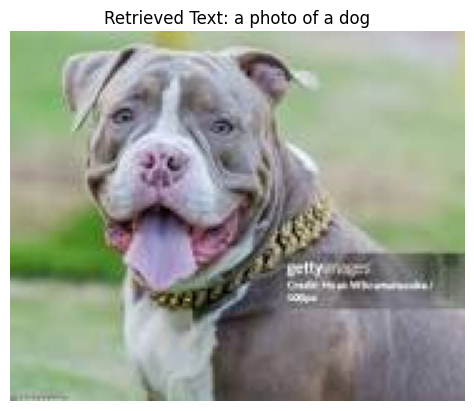

Image: my_images/Cat 1.jpg -> Retrieved Text: a photo of a dog


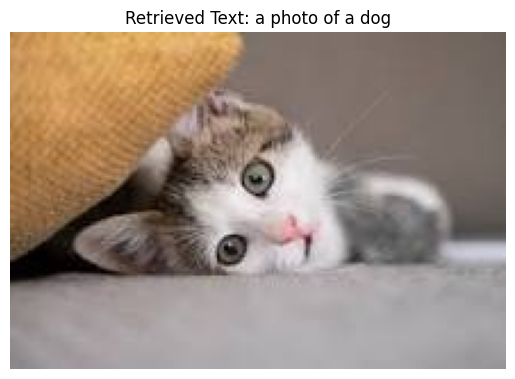

Image: my_images/Lion 1.jpg -> Retrieved Text: a photo of a dog


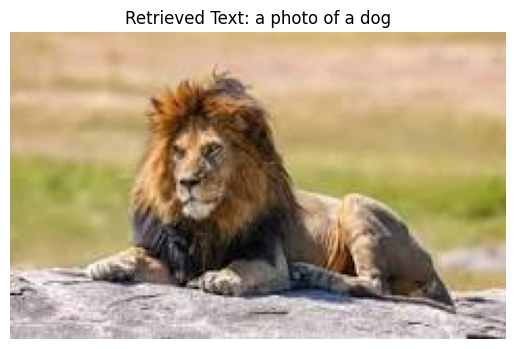

Image: my_images/House 2.jpg -> Retrieved Text: a sketch of a house


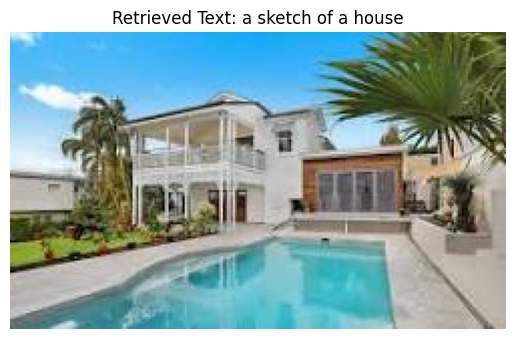

Image: my_images/Plane 1.jpg -> Retrieved Text: a photo of a dog


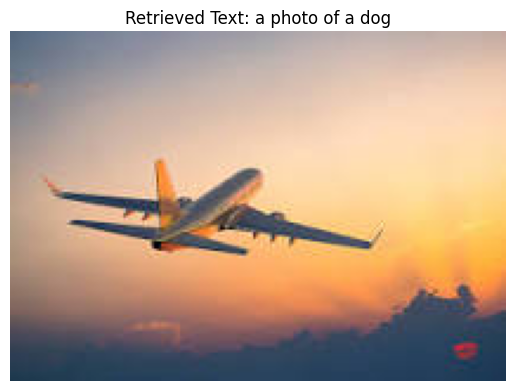

Image: my_images/Lion 2.jpg -> Retrieved Text: a photo of a dog


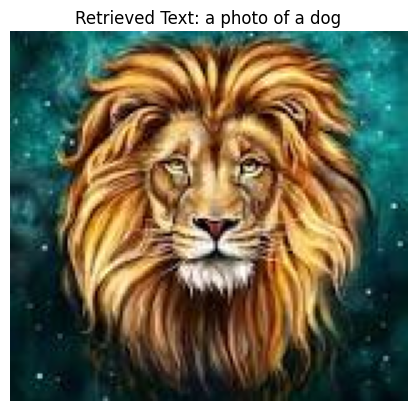

Image: my_images/Phone 1.jpg -> Retrieved Text: a photo of a dog


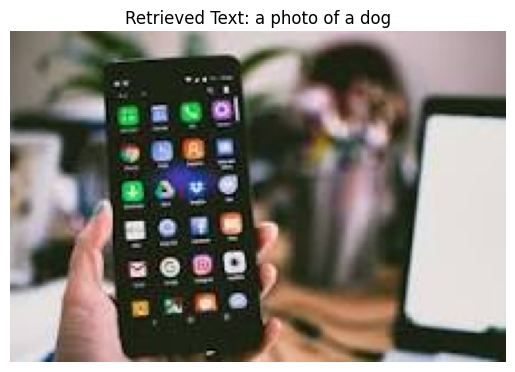

Image: my_images/Cat 2.jpg -> Retrieved Text: a photo of a dog


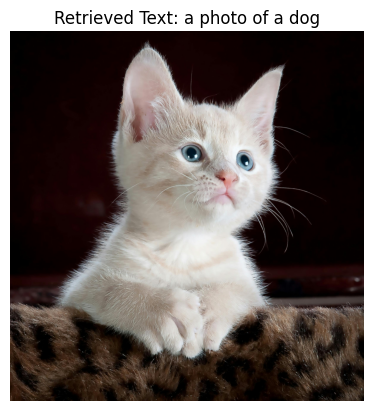

Image: my_images/House 1.jpg -> Retrieved Text: a sketch of a house


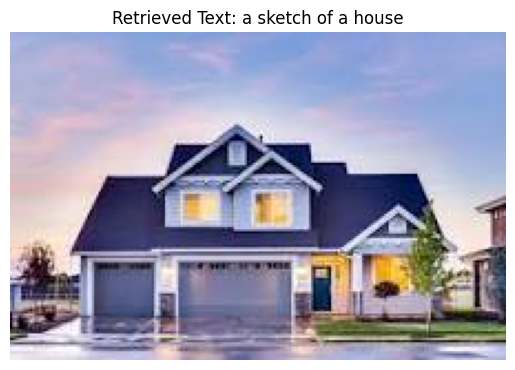

Image: my_images/House 3.jpg -> Retrieved Text: a sketch of a house


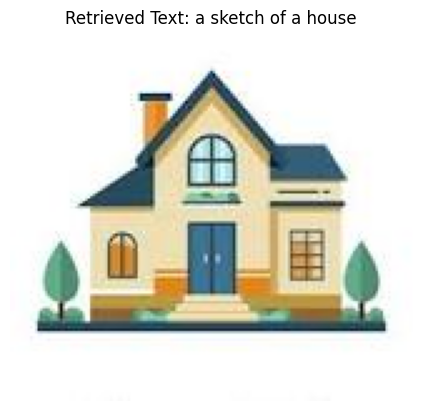

Image: my_images/Guitar 1.jpg -> Retrieved Text: a cartoon of a guitar


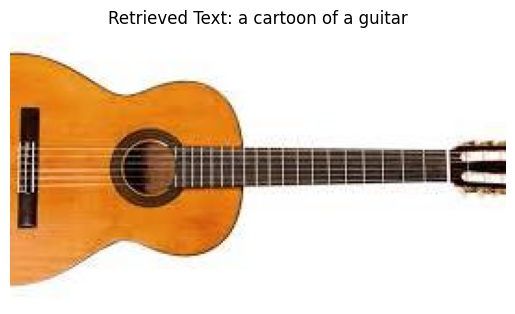

Image: my_images/Plane 2.jpg -> Retrieved Text: a cartoon of a guitar


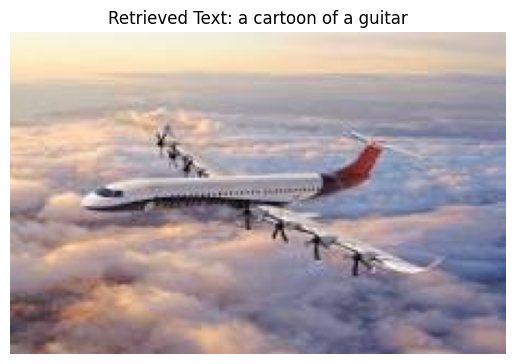

Image: my_images/Bully Dog 2 (1).jpg -> Retrieved Text: a photo of a dog


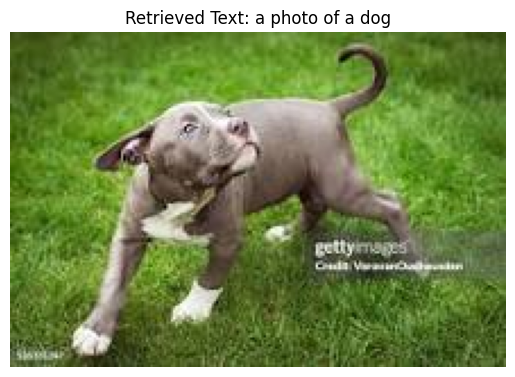

Image: my_images/Cute Dog 2.jpg -> Retrieved Text: a photo of a dog


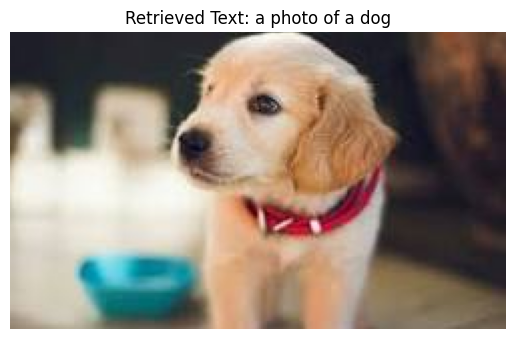

Image: my_images/Phone 2.jpg -> Retrieved Text: a photo of a dog


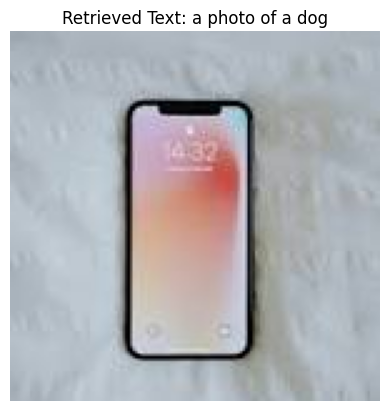

Image: my_images/Cute Dog 1.jpg -> Retrieved Text: a photo of a dog


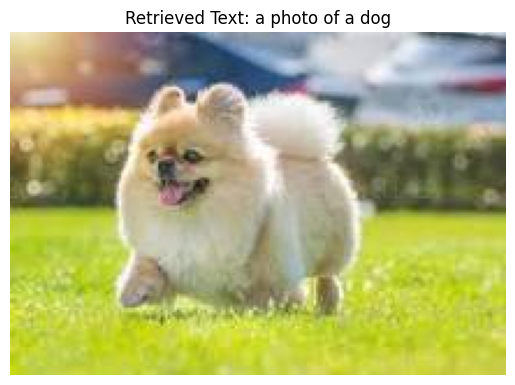

Image: my_images/Violen 1.jpg -> Retrieved Text: a cartoon of a guitar


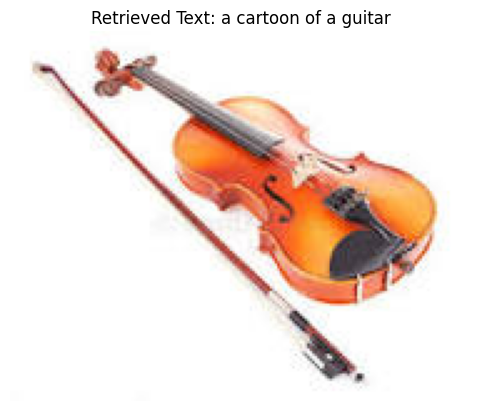

In [13]:
for idx, path in enumerate(image_paths):
    # Similarity between this image and all text queries
    sims = (image_features[idx] @ text_features.T).squeeze()
    best_idx = sims.argmax().item()
    best_query = queries[best_idx]

    # Print result
    print(f"Image: {path} -> Retrieved Text: {best_query}")

    # Show image with retrieved text as title
    img = Image.open(path)
    plt.imshow(img)
    plt.title(f"Retrieved Text: {best_query}")
    plt.axis("off")
    plt.show()

Table for report


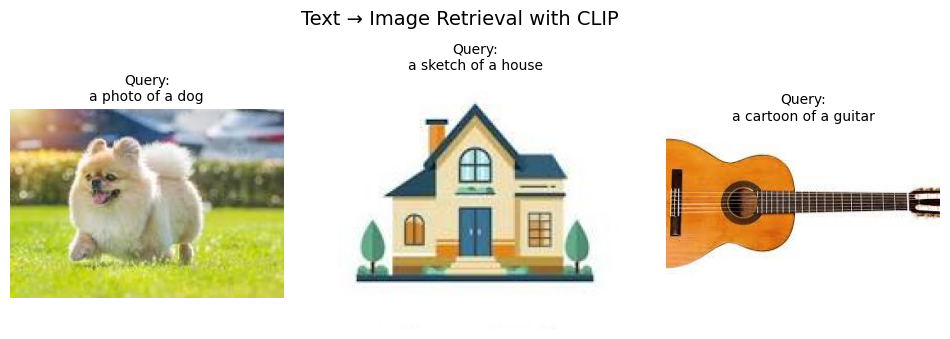

In [14]:
n = 3
plt.figure(figsize=(12, 4))

for i, q in enumerate(queries[:n]):
    sims = (image_features @ text_features[i].T).squeeze()
    best_idx = sims.argmax().item()
    best_path = image_paths[best_idx]

    # Plot retrieved image with query as caption
    img = Image.open(best_path)
    plt.subplot(1, n, i+1)
    plt.imshow(img)
    plt.title(f"Query:\n{q}", fontsize=10)
    plt.axis("off")

plt.suptitle("Text → Image Retrieval with CLIP", fontsize=14)
plt.show()

Loading ImageNet R dataset

In [15]:
dataset = load_dataset("axiong/imagenet-r", split="test")  # no streaming
print("Full dataset loaded:", len(dataset))




README.md: 0.00B [00:00, ?B/s]

test/test-00000-of-00005.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

test/test-00001-of-00005.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

test/test-00002-of-00005.parquet:   0%|          | 0.00/403M [00:00<?, ?B/s]

test/test-00003-of-00005.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

test/test-00004-of-00005.parquet:   0%|          | 0.00/417M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Full dataset loaded: 30000


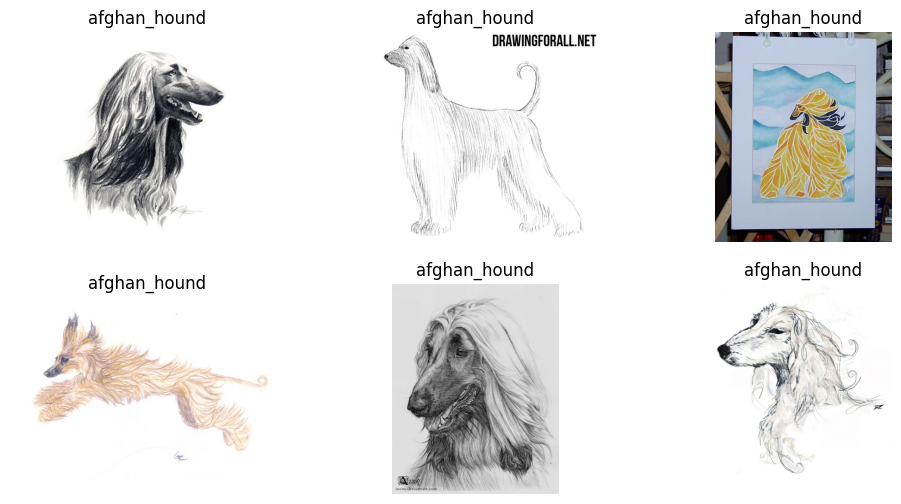

In [16]:
plt.figure(figsize=(12,6))
for i in range(6):
    img = dataset[i]["image"]
    label = dataset[i]["class_name"]
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
plt.show()

In [17]:
classes = sorted(set(ex["class_name"] for ex in dataset))
print("Number of classes:", len(classes))
print(classes[:10])

Number of classes: 200
['African_chameleon', 'Granny_Smith', 'accordion', 'acorn', 'afghan_hound', 'ambulance', 'american_egret', 'ant', 'assault_rifle', 'axolotl']


In [18]:
# Make prompts like "a photo of a <class>"
prompts = [f"a photo of a {c}" for c in classes]

# Tokenize and encode text prompts
text_tokens = clip.tokenize(prompts).to(device)

with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)  # normalize

# Wrap dataset for DataLoader
class HFImageDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, preprocess):
        self.data = hf_dataset
        self.preprocess = preprocess
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        ex = self.data[idx]
        return self.preprocess(ex["image"]), ex["class_name"]

torch_dataset = HFImageDataset(dataset, preprocess)
loader = DataLoader(torch_dataset, batch_size=32, shuffle=False)  # adjust batch_size as needed

# Map class names to indices
class2idx = {c:i for i,c in enumerate(classes)}

correct, total = 0, 0

for images, labels in loader:
    images = images.to(device)
    with torch.no_grad():
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        sims = image_features @ text_features.T      # [batch, num_classes]
        preds = sims.argmax(dim=-1).cpu().numpy()

    label_indices = [class2idx[l] for l in labels]
    correct += sum(p==y for p,y in zip(preds, label_indices))
    total += len(labels)

print(f"Zero-shot Top-1 Accuracy on Imagenet R dataset is: {100*correct/total:.2f}%")


Zero-shot Top-1 Accuracy on Imagenet R dataset is: 65.78%


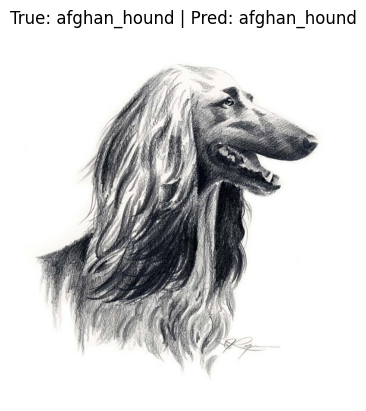

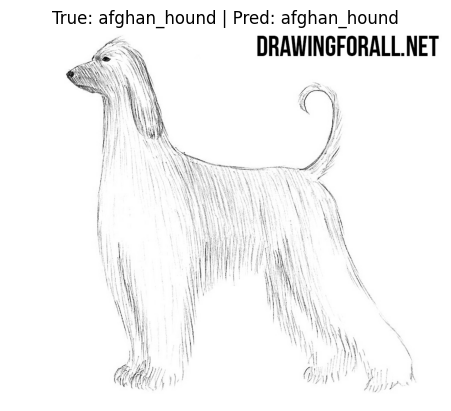

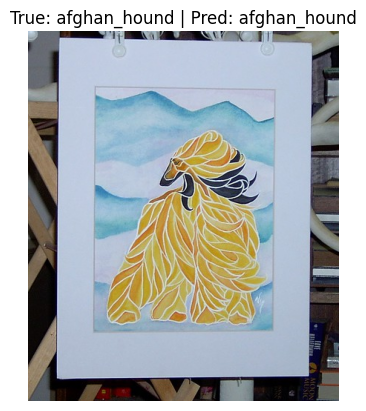

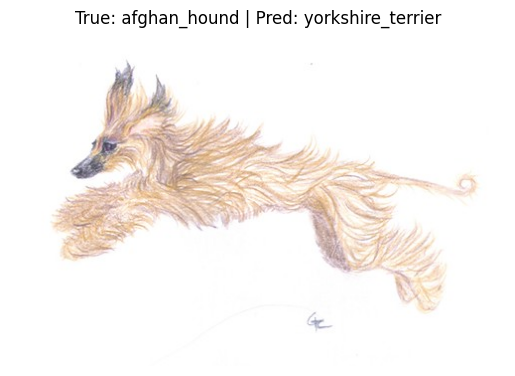

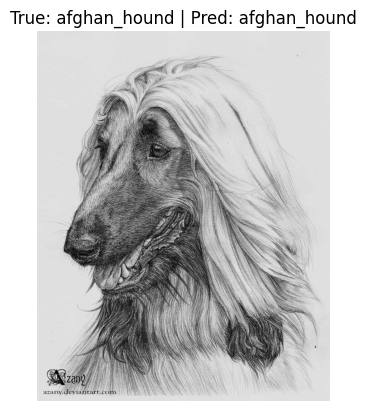

In [19]:
for i in range(5):  # first 5 images
    img = dataset[i]["image"]
    true_label = dataset[i]["class_name"]

    img_tensor = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        img_feat = model.encode_image(img_tensor)
        img_feat /= img_feat.norm(dim=-1, keepdim=True)
        sims = img_feat @ text_features.T
        pred_idx = sims.argmax().item()
        pred_class = classes[pred_idx]

    plt.imshow(img)
    plt.title(f"True: {true_label} | Pred: {pred_class}")
    plt.axis("off")
    plt.show()

Lets work on shape vs Texture Bias, 1st downloading the data

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/geirhos_conflict_stimuli/incomplete.GWUSHC_1.0.0/geirhos_conflict_stimuli-…

Dataset geirhos_conflict_stimuli downloaded and prepared to /root/tensorflow_datasets/geirhos_conflict_stimuli/1.0.0. Subsequent calls will reuse this data.


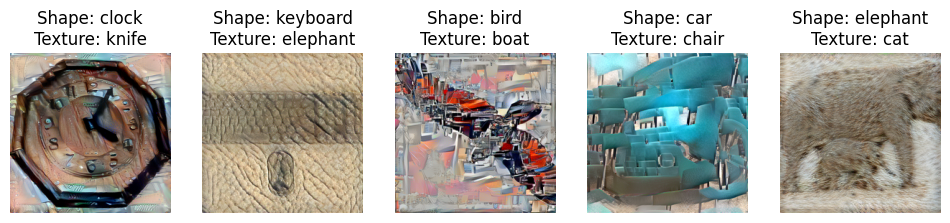

In [20]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load dataset
dataset, info = tfds.load('geirhos_conflict_stimuli', split='test', with_info=True)

# Get label names from info.features
shape_names = info.features['shape_label'].names
texture_names = info.features['texture_label'].names

# Visualize first 5 images with actual labels
plt.figure(figsize=(12,6))
for i, example in enumerate(dataset.take(5)):
    img = example['image']
    shape_label = shape_names[example['shape_label'].numpy()]   # map ID → name
    texture_label = texture_names[example['texture_label'].numpy()]

    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(f"Shape: {shape_label}\nTexture: {texture_label}")
    plt.axis('off')
plt.show()



Lets test it on clip

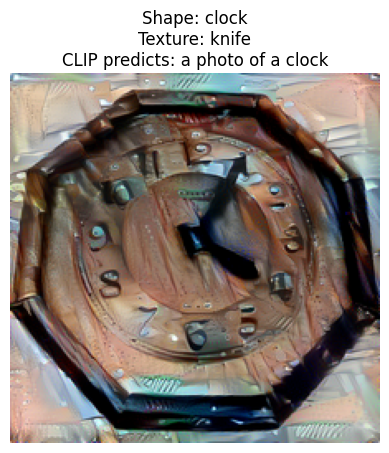

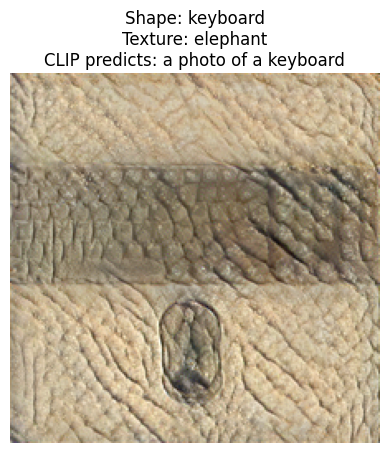

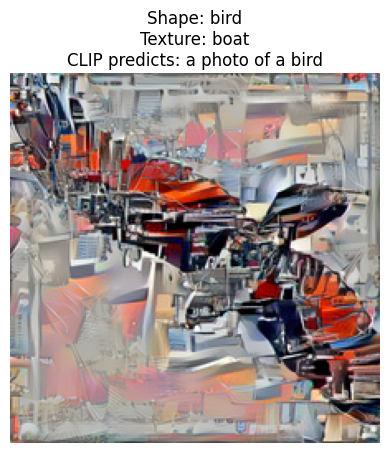

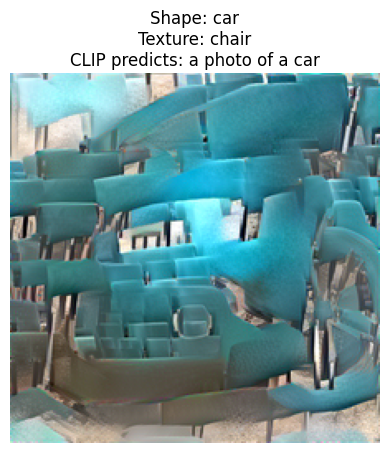

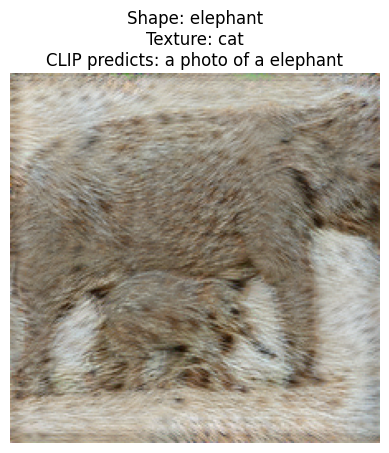

In [21]:
# Get human-readable names for shape and texture
shape_names = info.features['shape_label'].names
texture_names = info.features['texture_label'].names

# Take first 5 images for testing
for i, example in enumerate(dataset.take(5)):
    img_tf = example['image']

    # Convert TensorFlow tensor to PIL Image
    img = Image.fromarray(img_tf.numpy())

    # Get true labels as names
    shape_label = shape_names[example['shape_label'].numpy()]
    texture_label = texture_names[example['texture_label'].numpy()]

    # Create text prompts using only shape label
    text_prompts = [f"a photo of a {shape_label}"]

    # Tokenize text
    text_tokens = clip.tokenize(text_prompts).to(device)

    # Encode text
    with torch.no_grad():
        text_features = model.encode_text(text_tokens)
        text_features /= text_features.norm(dim=-1, keepdim=True)

    # Preprocess image and encode
    img_tensor = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(img_tensor)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        # Compute similarity
        sims = (image_features @ text_features.T).squeeze()
        pred_idx = sims.argmax().item()
        pred_class = text_prompts[pred_idx]

    # Display image with shape label and CLIP prediction
    plt.imshow(img)
    plt.title(f"Shape: {shape_label}\nTexture: {texture_label}\nCLIP predicts: {pred_class}")
    plt.axis("off")
    plt.show()

CLIP vs RESNET Model

In [23]:
from torchvision import models
import torch
import torch.nn as nn
# Load the same ResNet-50 architecture
resnet_model = models.resnet50(pretrained=False)

# Adjust final layer again for CIFAR-10 (10 classes)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 10)

# Load the weights
resnet_model.load_state_dict(torch.load("resnet50_cifar10.pth"))

# Set model to evaluation mode
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Lets append our comparison set made earlier with this dataset


In [24]:
# Take first 5 images from Geirhos dataset
for i, example in enumerate(dataset.take(5)):
    # Convert TensorFlow tensor to PIL Image
    img_pil = Image.fromarray(example['image'].numpy())

    # Get shape label (human-readable)
    shape_label = shape_names[example['shape_label'].numpy()]

    # Append to comparison_set
    comparison_set.append({
        "image": img_pil,
        "label": shape_label,
        "domain": "Geirhos"
    })

print(f"Updated comparison set size: {len(comparison_set)}")
print("Example from Geirhos added:", comparison_set[-1])

Updated comparison set size: 25
Example from Geirhos added: {'image': <PIL.Image.Image image mode=RGB size=224x224 at 0x7D9AAF0DB410>, 'label': 'elephant', 'domain': 'Geirhos'}


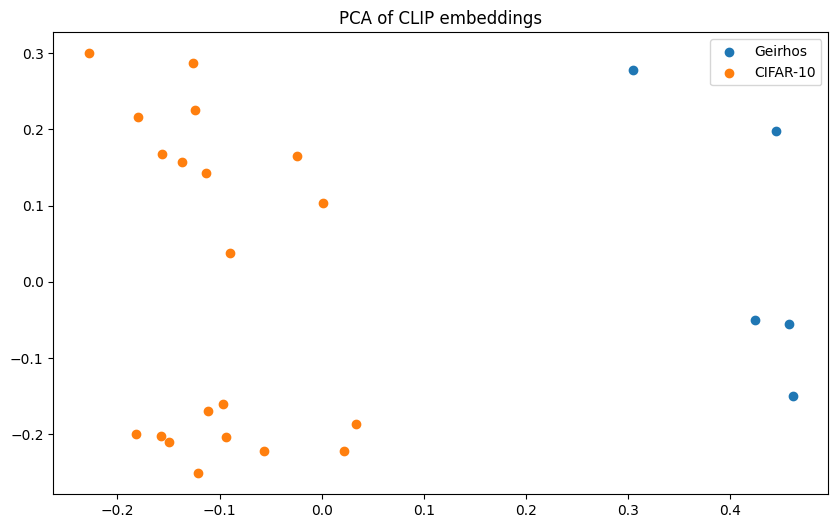

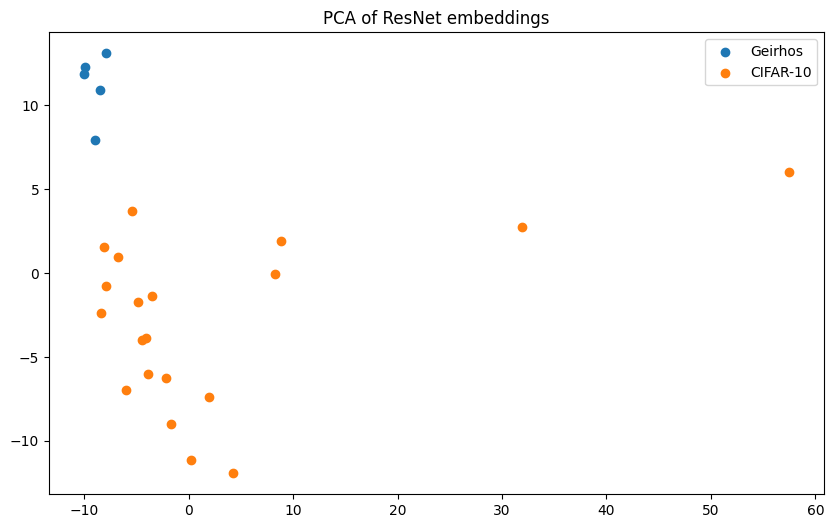

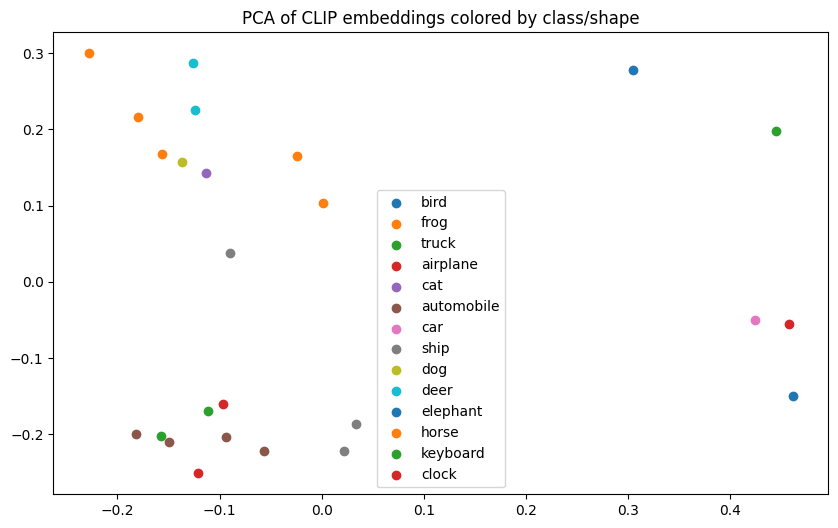

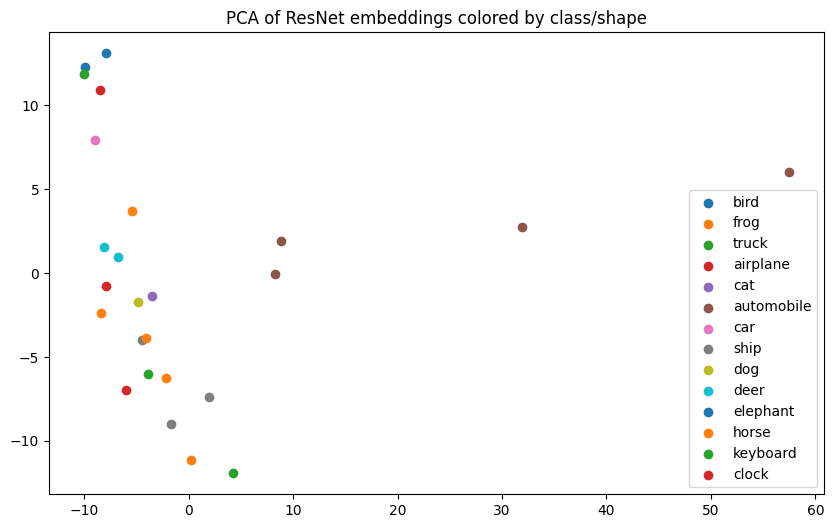

In [25]:
from sklearn.decomposition import PCA

device = "cuda" if torch.cuda.is_available() else "cpu"

# -----------------------------
# 1️⃣ Extract embeddings (same as before)
# -----------------------------
clip_embeddings = []
resnet_embeddings = []

# ResNet feature extractor (remove final fc layer)
resnet_feature_extractor = nn.Sequential(*list(resnet_model.children())[:-1])
resnet_feature_extractor.eval().to(device)

# ResNet preprocessing (for Geirhos images)
resnet_preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

for sample in comparison_set:
    img = sample["image"]

    # ---- CLIP embedding ----
    if isinstance(img, torch.Tensor):
        img_clip = img.unsqueeze(0).to(device)
    else:
        img_clip = preprocess(img).unsqueeze(0).to(device)

    with torch.no_grad():
        emb_clip = model.encode_image(img_clip)
        emb_clip /= emb_clip.norm(dim=-1, keepdim=True)
        clip_embeddings.append(emb_clip.cpu())

    # ---- ResNet embedding ----
    if isinstance(img, Image.Image):
        img_resnet = resnet_preprocess(img).unsqueeze(0).to(device)
    else:
        img_resnet = img.unsqueeze(0).to(device)

    with torch.no_grad():
        emb_resnet = resnet_feature_extractor(img_resnet)
        emb_resnet = emb_resnet.view(emb_resnet.size(0), -1)
        resnet_embeddings.append(emb_resnet.cpu())

# -----------------------------
# 2️⃣ Stack embeddings into tensors
# -----------------------------
clip_embeddings_tensor = torch.cat(clip_embeddings, dim=0)      # [N, D_clip]
resnet_embeddings_tensor = torch.cat(resnet_embeddings, dim=0)  # [N, D_resnet]

# Labels and domains
labels = [sample["label"] for sample in comparison_set]
domains = [sample["domain"] for sample in comparison_set]

# -----------------------------
# 3️⃣ PCA for dimensionality reduction
# -----------------------------
pca_clip = PCA(n_components=2)
clip_2d = pca_clip.fit_transform(clip_embeddings_tensor.numpy())

pca_resnet = PCA(n_components=2)
resnet_2d = pca_resnet.fit_transform(resnet_embeddings_tensor.numpy())

# -----------------------------
# 4️⃣ Plot embeddings
# -----------------------------
def plot_2d(emb_2d, labels, domains, title):
    plt.figure(figsize=(10,6))
    for domain in set(domains):
        idxs = [i for i,d in enumerate(domains) if d==domain]
        plt.scatter(emb_2d[idxs,0], emb_2d[idxs,1], label=domain)
    plt.title(title)
    plt.legend()
    plt.show()

# CLIP embeddings colored by domain
plot_2d(clip_2d, labels, domains, "PCA of CLIP embeddings")

# ResNet embeddings colored by domain
plot_2d(resnet_2d, labels, domains, "PCA of ResNet embeddings")


def plot_labels(emb_2d, labels, title):
    plt.figure(figsize=(10,6))
    unique_labels = list(set(labels))
    for lbl in unique_labels:
        idxs = [i for i,l in enumerate(labels) if l==lbl]
        plt.scatter(emb_2d[idxs,0], emb_2d[idxs,1], label=lbl)
    plt.title(title)
    plt.legend()
    plt.show()

# CLIP by class/shape
plot_labels(clip_2d, labels, "PCA of CLIP embeddings colored by class/shape")

# ResNet by class/shape
plot_labels(resnet_2d, labels, "PCA of ResNet embeddings colored by class/shape")
